Импортируем необходимые библиотеки для работы.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pandas_datareader as web
from matplotlib.ticker import FuncFormatter

Импортируем таблицу с ценами закрытия за период с апреля 2022 года по октябрь 2022 года

Преобразуем первую колонку в индекс.

In [ ]:
appl = pd.read_csv("AAPL Historical Data.csv", sep=';')
appl = appl.set_index('Date')

mstr = pd.read_csv("MSTR Historical Data.csv", sep=';')
mstr = mstr.set_index('Date')

sber = pd.read_csv("SBER Historical Data.csv", sep=';')
sber = sber.set_index('Date')

blk = pd.read_csv('BLK Historical Data.csv', sep=';')
blk = blk.set_index('Date')

tsla = pd.read_csv("TSLA Historical Data.csv", sep=';')
tsla = tsla.set_index('Date')


In [ ]:
appl.head()

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
12.13.2023,197.96,195.09,198.00,194.85,67.76M,1.67%
12.12.2023,194.71,193.08,194.72,191.72,51.29M,0.79%
12.11.2023,193.18,193.11,193.49,191.42,60.78M,-1.29%
12.08.2023,195.71,194.20,195.99,193.67,53.41M,0.74%
12.07.2023,194.27,193.63,195.00,193.59,47.34M,1.01%


In [ ]:
data = pd.DataFrame({
    "appl": appl["Price"],
})
data["mstr"] = mstr["Price"]
# data["sber"] = sber["Price"]
data["tsla"] = tsla["Price"]
data["blk"] = blk["Price"]

data = data.apply(lambda col: col[::-1])
data.head()

,appl,mstr,tsla,blk
Date,,,,
12.01.2021,164.77,705.47,365.00,NaN
12.02.2021,163.76,683.36,361.53,NaN
12.03.2021,161.84,630.99,338.32,NaN
12.06.2021,165.32,596.47,336.34,NaN
12.07.2021,171.18,628.17,350.58,NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 512 entries, 12.01.2021 to 12.13.2023
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   appl    512 non-null    float64
 1   mstr    512 non-null    float64
 2   tsla    512 non-null    float64
 3   blk     260 non-null    float64
dtypes: float64(4)
memory usage: 20.0+ KB


In [ ]:
data.isnull().sum()

appl      0
mstr      0
tsla      0
blk     252
dtype: int64

Создаем список с названиями тикеров.

In [ ]:
data.head()

,appl,mstr,tsla,blk
Date,,,,
12.01.2021,164.77,705.47,365.00,NaN
12.02.2021,163.76,683.36,361.53,NaN
12.03.2021,161.84,630.99,338.32,NaN
12.06.2021,165.32,596.47,336.34,NaN
12.07.2021,171.18,628.17,350.58,NaN


In [ ]:
tickers = data.columns.tolist()
tickers


['appl', 'mstr', 'tsla', 'blk']

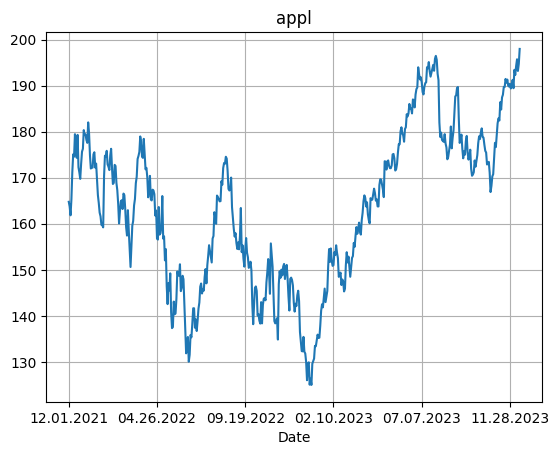

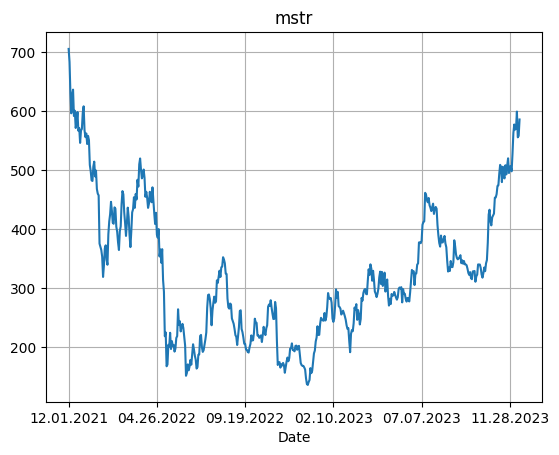

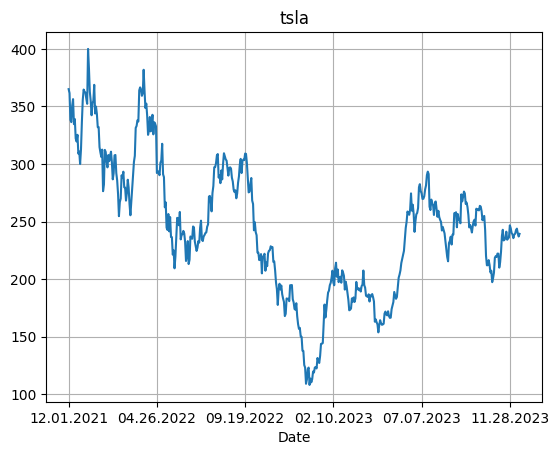

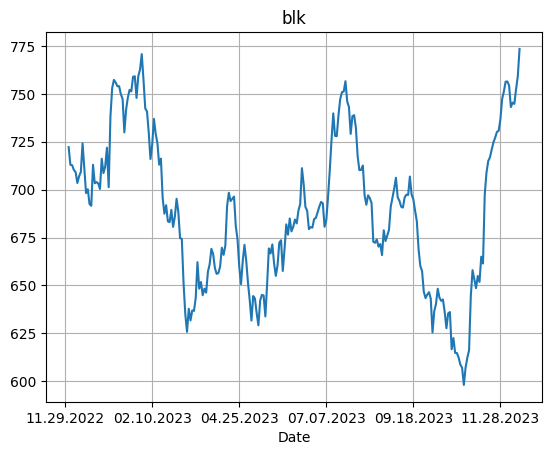

In [ ]:
for name in data:
  data[name].plot()
  plt.grid()
  plt.title(name)
  plt.show()

Находим первые разности и среднюю доходность каждой акции (dohMean).

In [ ]:
dCloseData= data.pct_change()
dCloseData

,appl,mstr,tsla,blk
Date,,,,
12.01.2021,NaN,NaN,NaN,NaN
12.02.2021,-0.006130,-0.031341,-0.009507,NaN
12.03.2021,-0.011724,-0.076636,-0.064199,NaN
12.06.2021,0.021503,-0.054708,-0.005852,NaN
12.07.2021,0.035446,0.053146,0.042338,NaN
...,...,...,...,...
12.07.2023,0.010139,0.003867,0.013661,0.003189
12.08.2023,0.007412,0.049554,0.004946,-0.000952
12.11.2023,-0.012927,-0.072724,-0.016814,0.010312


In [ ]:
dohMean = dCloseData.mean()
dohMean

appl    0.000530
mstr    0.001342
tsla   -0.000083
blk     0.000358
dtype: float64

In [ ]:
dohSTD = dCloseData.std()
dohSTD

appl    0.018523
mstr    0.057913
tsla    0.038516
blk     0.013725
dtype: float64

Создаем датафрейм с матрицей ковариаций и строим графики.

In [ ]:
cov = dCloseData.cov()
cov

,appl,mstr,tsla,blk
appl,0.000343,0.000575,0.000418,0.000087
mstr,0.000575,0.003354,0.001207,0.000186
tsla,0.000418,0.001207,0.001484,0.000168
blk,0.000087,0.000186,0.000168,0.000188


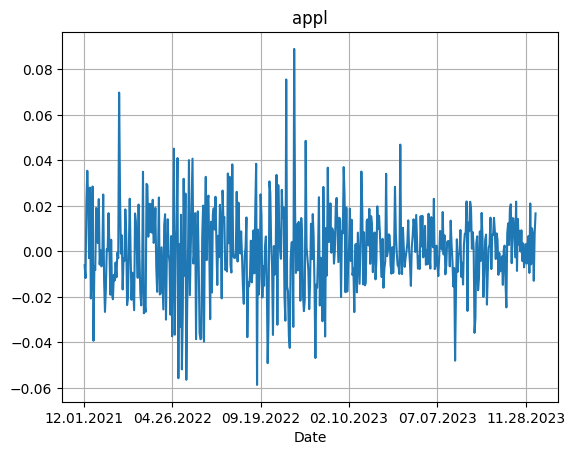

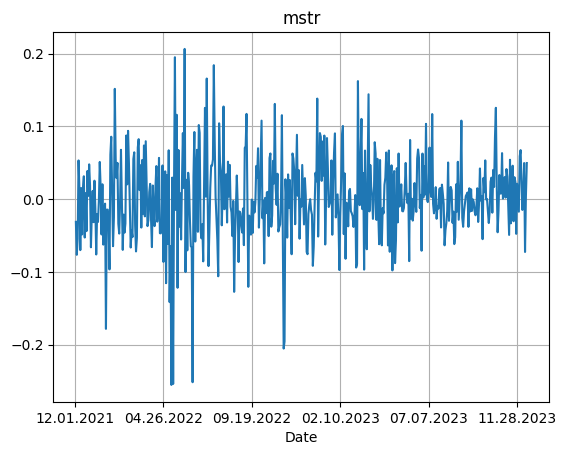

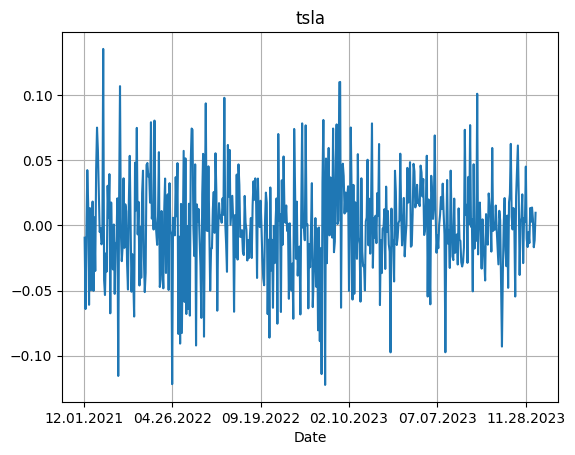

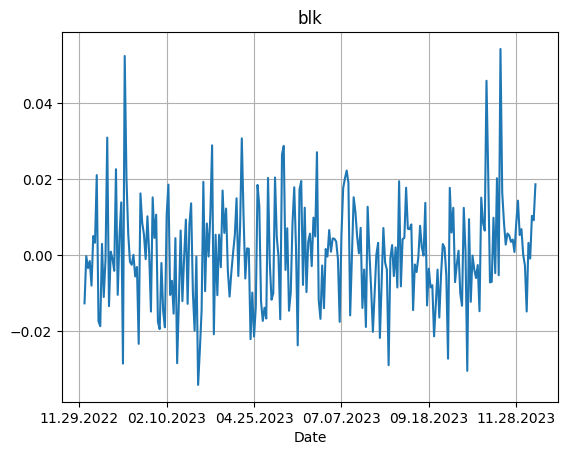

In [ ]:
for name in dCloseData.columns:
    dCloseData[name].plot()
    plt.title(name)
    plt.grid()
    plt.show()

Создаем функции для дальнейшего имитационного моделирования.

randPortf -  для моделирвоания рандомных долей каждой акции в портфеле.  

dohPortf - для нахождения доходности портфеля через матричное произведения заданных долей и доходности акции.

riskPortf - для расчета уровня риска.

In [ ]:
#Находим количество колонок
cnt = len(dCloseData.columns)
print(cnt)
def randPortf():
    res = np.exp(np.random.randn(cnt))
    res = res / res.sum()
    return res

r = randPortf()
print(r)
print(r.sum())

4
[0.02405285 0.03381793 0.7038428  0.23828642]
1.0


In [ ]:
def dohPortf(r):
    return np.matmul(dohMean.values,r)

r = randPortf()
print(r)
d = dohPortf(r)
print(d)

[0.74539467 0.04127455 0.15529603 0.05803475]
0.0004584880001095277


In [ ]:
def riskPortf(r):
    return np.sqrt(np.matmul(np.matmul(r,cov.values),r))

r = randPortf()
print(r)
rs = riskPortf(r)
print(rs)

[0.59525582 0.20272236 0.14025764 0.06176418]
0.024094027845974923


Создаем облако 10 000 различных портфелей, используя randPortf, и оцениваем доходность и волатильность с помощью dohPortf и riskPortf. Результаты сохраняем в 3 списка.

In [ ]:
N = 10000

risk = np.zeros(N)
doh = np.zeros(N)
portf = np.zeros((N,cnt))

for n in range(N):
    r = randPortf()

    portf[n,:] = r
    risk[n] = riskPortf(r)
    doh[n] = dohPortf(r)

Визуализируем полученные результаты. На рисунке отражены 10 000 полученных портфелей и выделены:
1. портфель с минимальным риском
2. портфель с максимальным коэффициентом Шарпа (доходность/риск)
3. портфель с равными долями активов

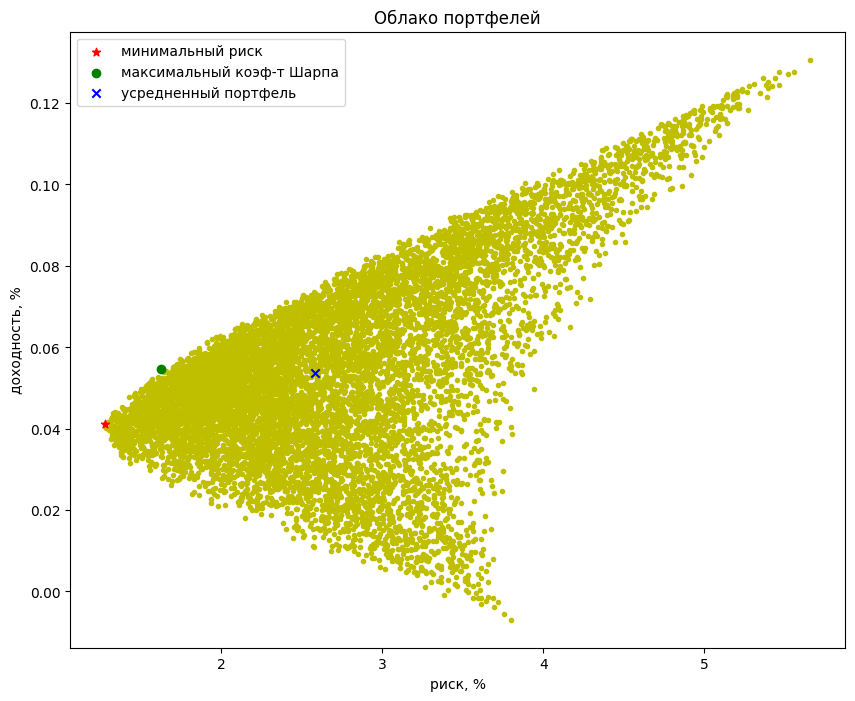

In [ ]:

plt.figure(figsize=(10,8))

plt.scatter(risk*100,doh*100,c='y',marker='.')
plt.xlabel('риск, %')
plt.ylabel('доходность, %')
plt.title("Облако портфелей")

min_risk = np.argmin(risk)
plt.scatter([(risk[min_risk])*100],[(doh[min_risk])*100],c='r',marker='*',label='минимальный риск')

maxSharpKoef = np.argmax(doh/risk)
plt.scatter([risk[maxSharpKoef]*100],[doh[maxSharpKoef]*100],c='g',marker='o',label='максимальный коэф-т Шарпа')

r_mean = np.ones(cnt)/cnt
risk_mean = riskPortf(r_mean)
doh_mean = dohPortf(r_mean)
plt.scatter([risk_mean*100],[doh_mean*100],c='b',marker='x',label='усредненный портфель')

plt.legend()

plt.show()

Результат оптимизации портфеля.

In [ ]:
print('---------- Минимальный риск ----------')
print()
print("риск = %1.2f%%" % (float(risk[min_risk])*100.))
print("доходность = %1.2f%%" % (float(doh[min_risk])*100.))
print()
print(pd.DataFrame([portf[min_risk]*100],columns=dCloseData.columns,index=['доли, %']).T)
print()

print('---------- Максимальный коэффициент Шарпа ----------')
print()
print("риск = %1.2f%%" % (float(risk[maxSharpKoef])*100.))
print("доходность = %1.2f%%" % (float(doh[maxSharpKoef])*100.))
print()
print(pd.DataFrame([portf[maxSharpKoef]*100],columns=dCloseData.columns,index=['доли, %']).T)
print()

print('---------- Средний портфель ----------')
print()
print("риск = %1.2f%%" % (float(risk_mean)*100.))
print("доходность = %1.2f%%" % (float(doh_mean)*100.))
print()
print(pd.DataFrame([r_mean*100],columns=dCloseData.columns,index=['доли, %']).T)
print()

---------- Минимальный риск ----------

риск = 1.28%
доходность = 0.04%

        доли, %
appl  27.934583
mstr   0.922747
tsla   0.692454
blk   70.450217

---------- Максимальный коэффициент Шарпа ----------

риск = 1.63%
доходность = 0.05%

        доли, %
appl  38.196203
mstr  12.669902
tsla   0.613339
blk   48.520555

---------- Средний портфель ----------

риск = 2.58%
доходность = 0.05%

      доли, %
appl     25.0
mstr     25.0
tsla     25.0
blk      25.0

